In [1]:
from base_functions import node, element_linear, element_nonlinear, system_from_mdpa

filename = "./Example_mdpas/E4.mdpa"
fix_mps = {
    "all": ["fixAll"],
    "x" : [],
    "y" : [],
    "z" : []
}

mp = {
    "claw": "StVenant",
    "YoungsModulus" : 1000000.0
}

s_l = system_from_mdpa(filename, fix_mps, material_parameters=mp, cross_area=0.01,linear_system=True)
s_nl = system_from_mdpa(filename, fix_mps, material_parameters=mp, cross_area=0.01,linear_system=False)

for s in [s_l, s_nl]:
    s.find_node(5,s.nodes).force[2] = 300
    s.find_node(5,s.nodes).force[0] = 300
    s.find_node(5,s.nodes).force[1] = 300

In [2]:
# solving nonlinear trusses
s_nl.solve_inverse_problem()

# solving linear trusses
s_l.solve_inverse_problem()

 >> starting to solve inverse problem
disp residual:  1.844795e+00   |   force residual:  5.196152e+02
disp residual:  8.664373e-01   |   force residual:  3.581876e+03
disp residual:  3.022858e-01   |   force residual:  1.562211e+03
disp residual:  8.169340e-02   |   force residual:  2.360071e+02
disp residual:  3.492556e-03   |   force residual:  7.706767e+00
disp residual:  3.531128e-06   |   force residual:  1.085852e-02
disp residual:  1.787885e-12   |   force residual:  9.157514e-09
disp residual:  1.607013e-15   |   force residual:  4.785662e-12
 >> inverse problem solved
 >> starting to solve inverse problem
disp residual:  1.844795e+00   |   force residual:  5.196152e+02
disp residual:  9.836327e-01   |   force residual:  8.324983e+03
disp residual:  7.408547e-01   |   force residual:  1.072083e+03
disp residual:  1.497053e-01   |   force residual:  1.583677e+03
disp residual:  3.376484e-01   |   force residual:  5.826505e+01
disp residual:  4.047100e-02   |   force residual:  

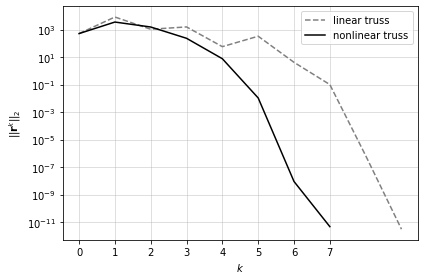

In [3]:
s_l.plot_convergence(label_text="linear truss")
s_nl.plot_convergence(label_text="nonlinear truss")
s_l.show_plot()
#s_l.save_plot_pdf("convergence_plot")

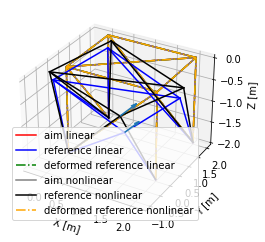

In [4]:
#%matplotlib qt 
fig, ax = s_l.create_plot_figures_3d()
plot_figures = {"fig":fig, "ax":ax}
s_l.plot(["aim","ref","extra"], plot_figures)
s_nl.plot(["aim","ref","extra"], plot_figures)
s_l.show_plot()